In [1]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
from Producers import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})

In [3]:
common_param = ['dimension', 'seed', 'nprod']

In [4]:
dims = [5, 10, 15, 20]

## Synth uniform dataset
Across different temeperatures

t = 100, 10, 1, 0.1, 0.01

In [5]:
df_100 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-uniform_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-uniform_linear_temp_1.0/concseeds5.pkl")

In [6]:
(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(8, 0, 0, 0, 0, 1)

In [7]:
df_100['emb_seed'].unique(), df_100['dimension'].unique(), df_100['nprod'].unique()

(array([13, 17, 23, 29, 19]),
 array([ 5, 10, 15, 20]),
 array([  2,   5,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

In [8]:
df_001[df_001['NE_exists'] == False]

,dimension,emb_seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
13,10,13,5,False,499,"[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.2, ...","[0.10034604488184455, 0.09954818061883565, 0.1...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
26,15,13,10,False,499,"[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[0.1, 0.1, 0.1, 0.0, 0.0, 0.1, 0.1, 0.0, 0.1, ...","[0.06730056604547782, 0.06691743467192814, 0.0...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13,10,17,5,False,499,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.2, 0.0, 0.0, ...","[0.09966997456828196, 0.1001160572325249, 0.09...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13,10,23,5,False,499,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, ...","[0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.2, ...","[0.1002726837965838, 0.10067925988211499, 0.09...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,10,29,2,False,499,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, ...","[0.10112742841901871, 0.10110488716473767, 0.1...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25,15,29,5,False,499,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0662566566740583, 0.06724423032432947, 0.06...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
38,20,29,10,False,499,"[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, ...","[0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, ...","[0.050078133785279026, 0.049848806809137, 0.05...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13,10,19,5,False,499,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, ...","[0.2, 0.0, 0.2, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, ...","[0.0998288612211732, 0.09953156901323978, 0.10...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [9]:
df_linear[df_linear['NE_exists'] == False]

,dimension,emb_seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
26,15,19,10,False,499,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, ...","[0.06638044181189726, 0.0664076402597995, 0.06...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


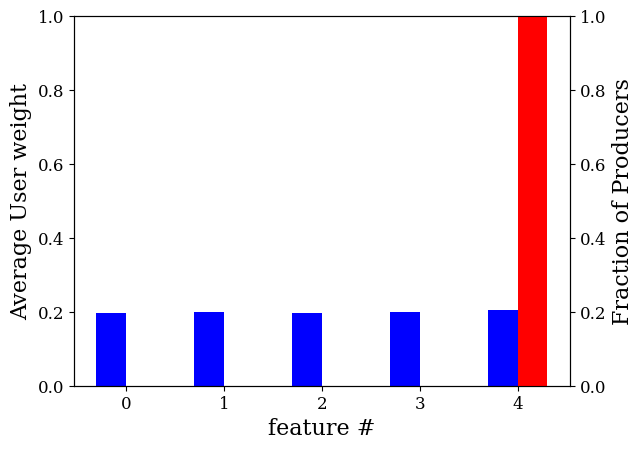

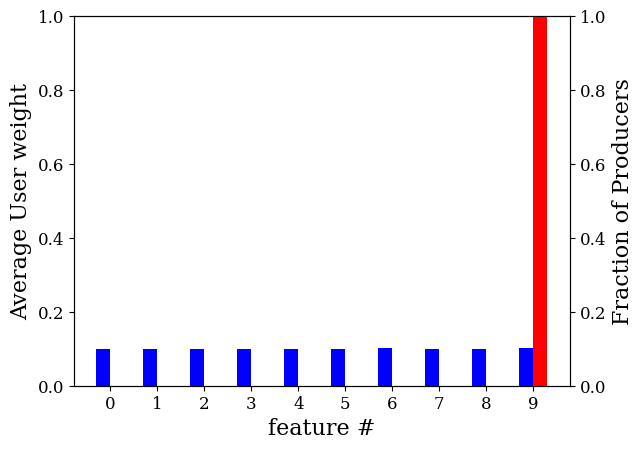

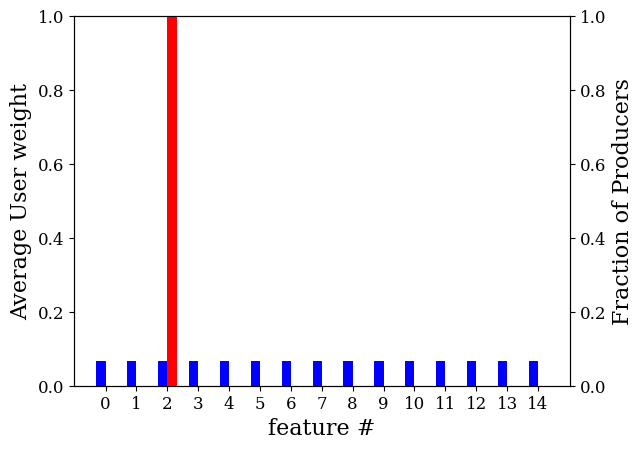

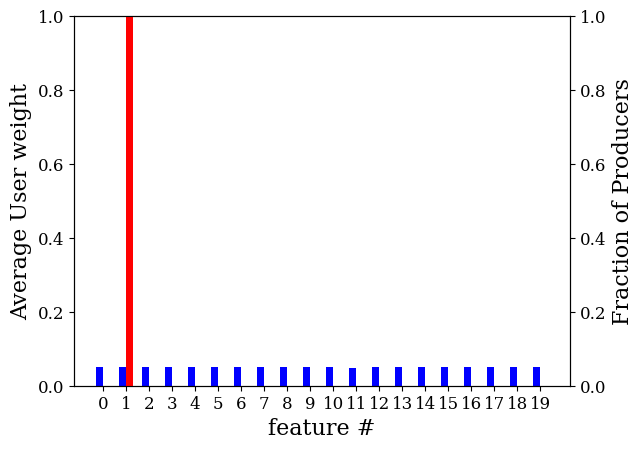

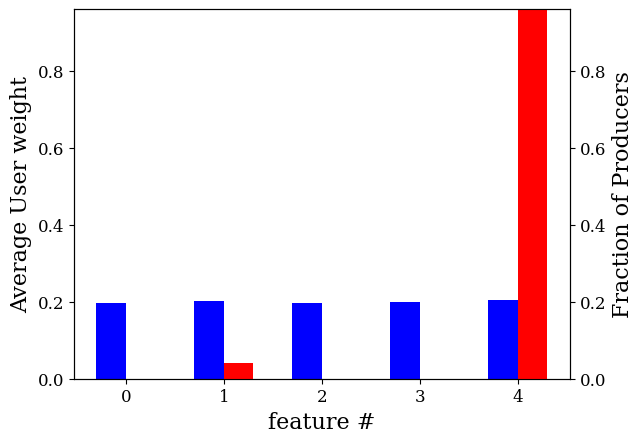

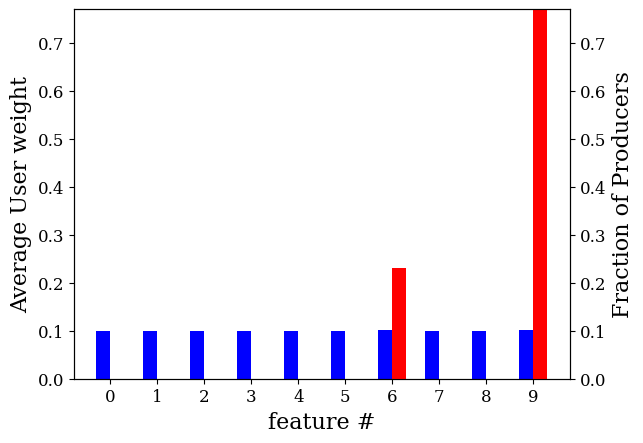

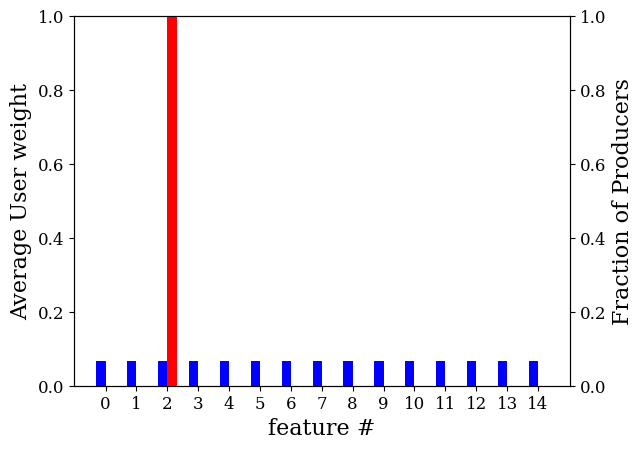

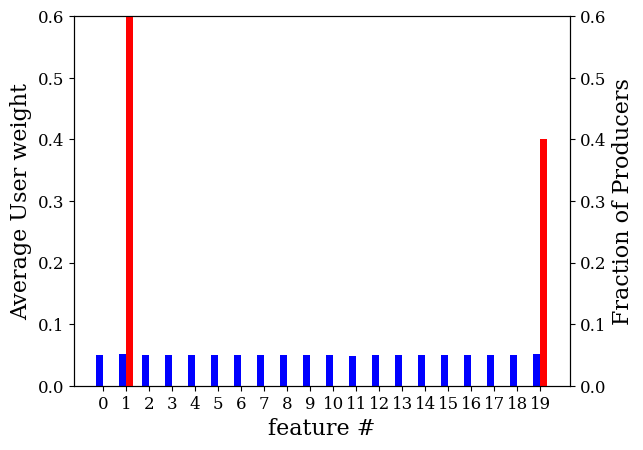

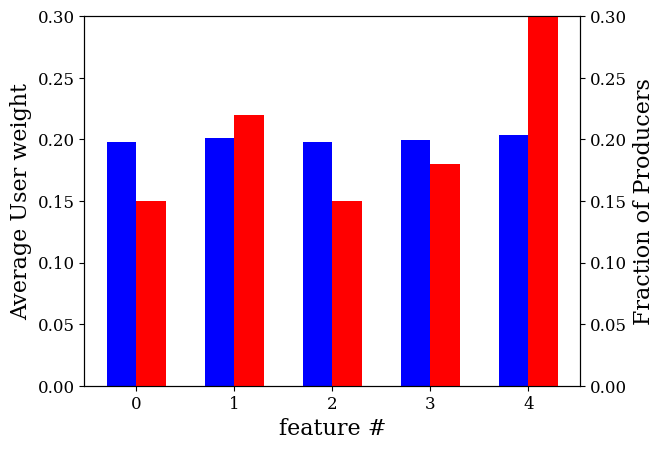

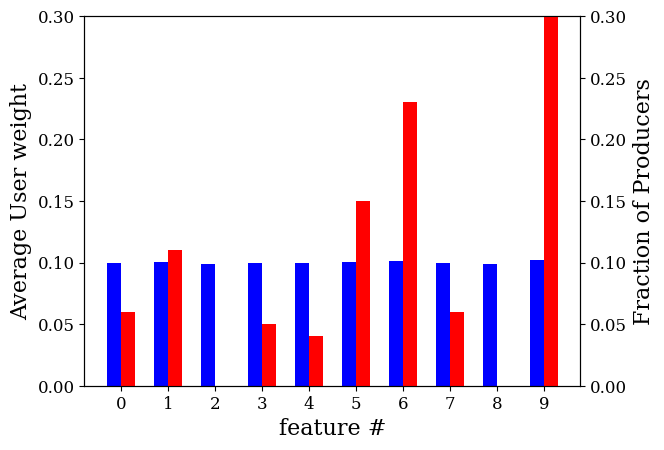

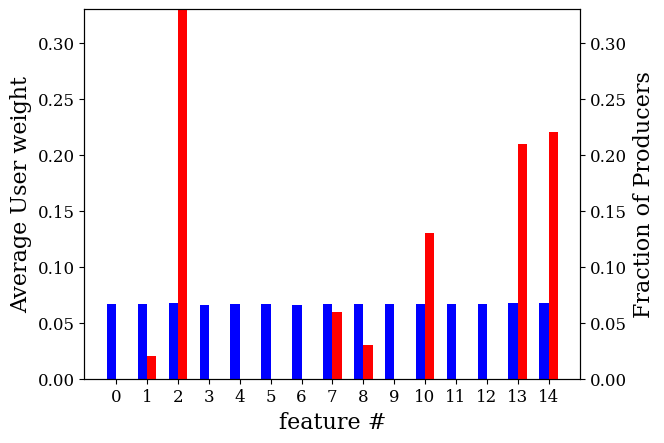

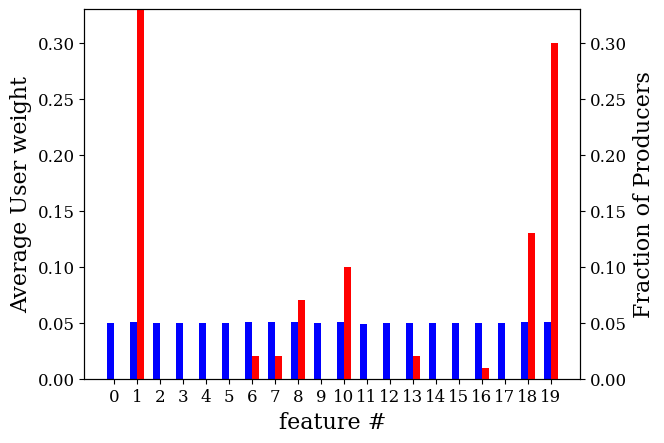

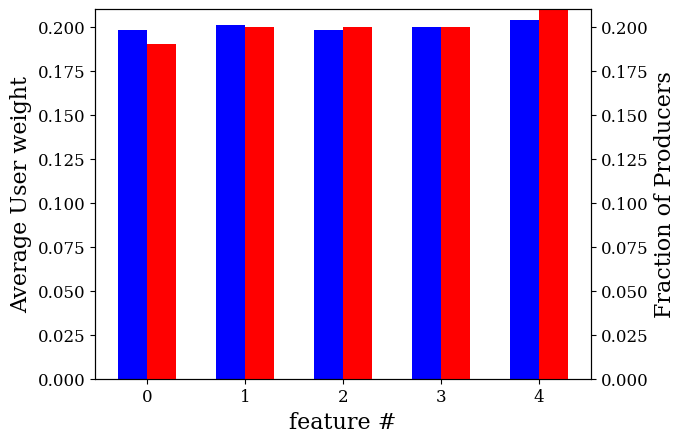

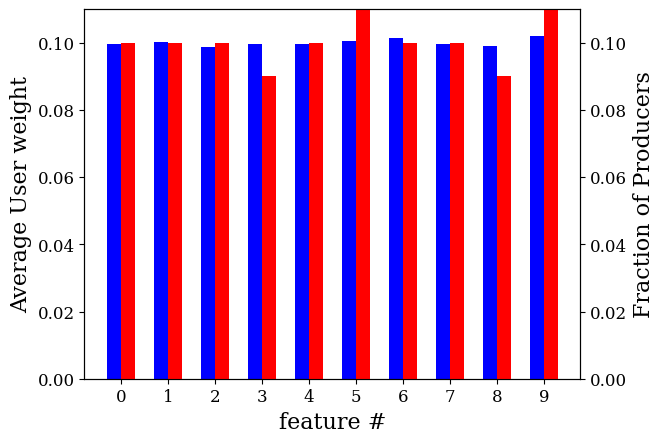

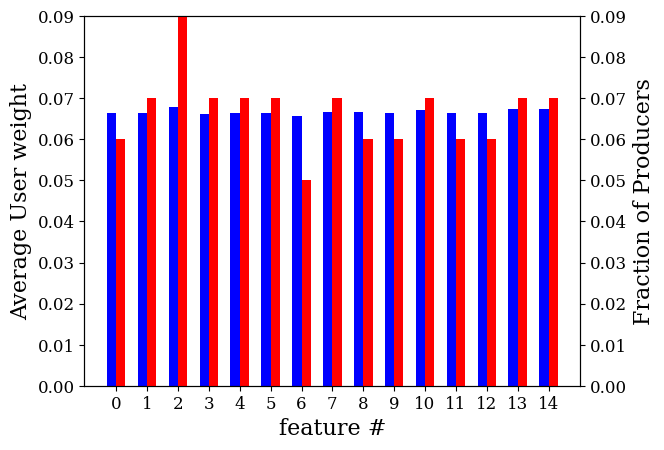

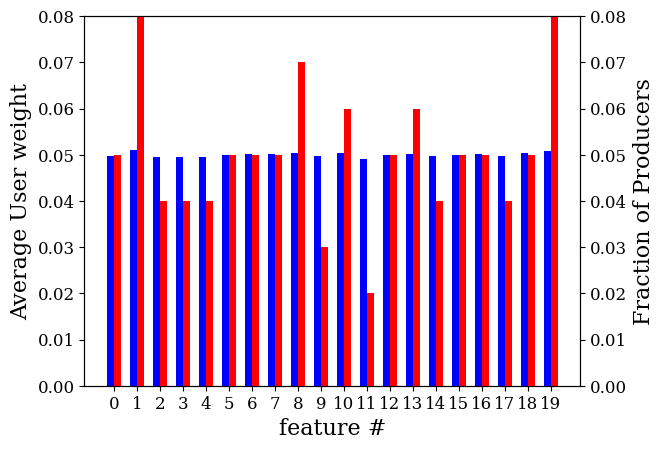

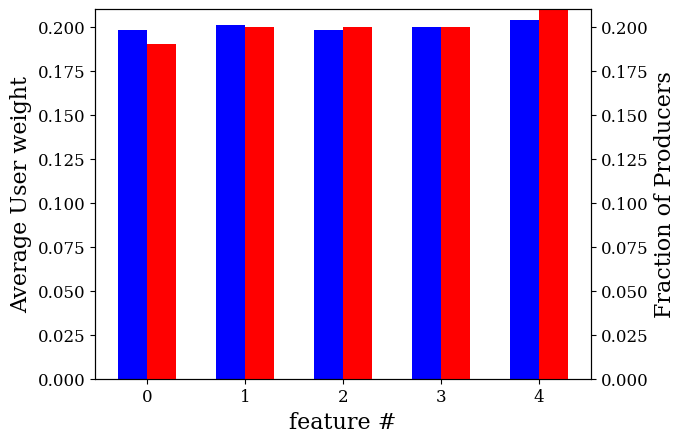

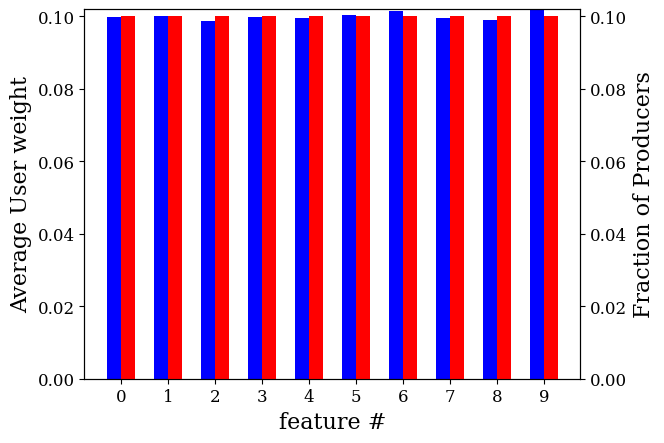

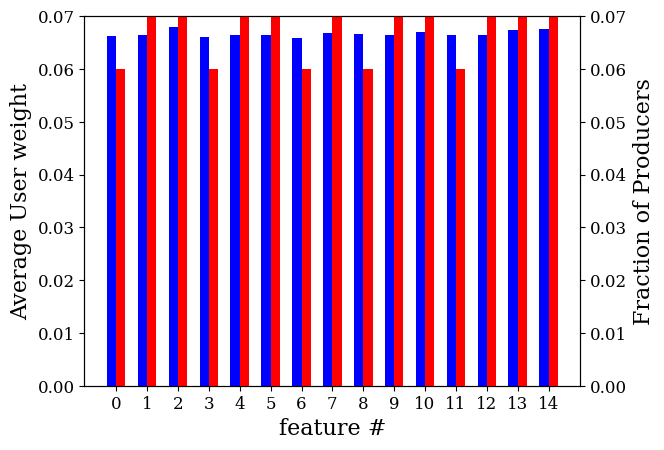

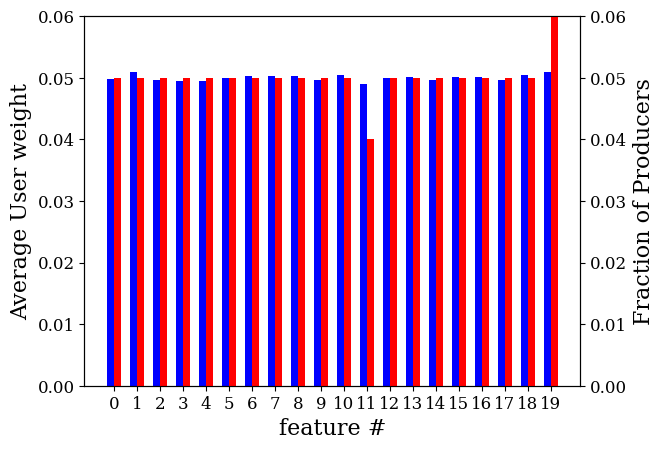

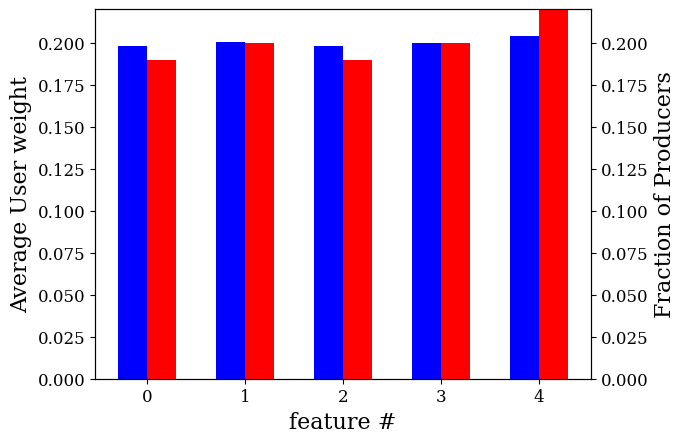

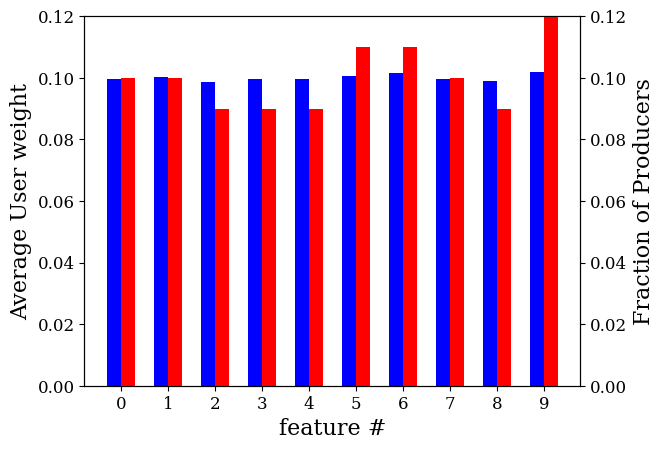

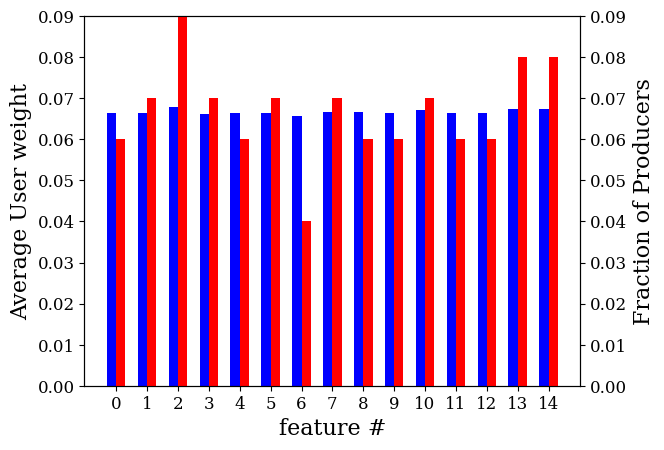

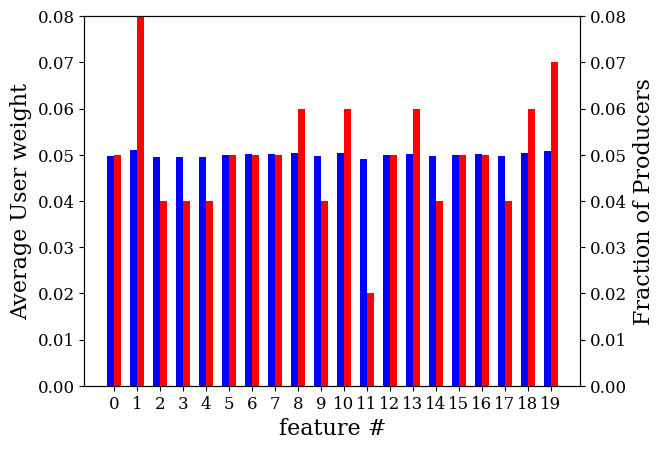

In [10]:
# temp = 100 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_100, name = 'synth-uniform/synth-uniform_temp100')
# temperature = 10
plot_and_save_singledf(dims = dims, df = df_10, name = 'synth-uniform/synth-uniform_temp10')
# temp 1
plot_and_save_singledf(dims = dims, df = df_1, name = 'synth-uniform/synth-uniform_temp1')
# temp 0.1
plot_and_save_singledf(dims = dims, df = df_01, name = 'synth-uniform/synth-uniform_temp01')
# temp 0.01
plot_and_save_singledf(dims = dims, df = df_001, name = 'synth-uniform/synth-uniform_temp001')

#linear
plot_and_save_singledf(dims = dims, df = df_linear, name = 'synth-uniform/synth-uniform_linear')

## Rentrunway dataset
Across different temeperatures

t = 100, 10, 1, 0.1, 0.01

In [11]:
df_100 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/rentrunway_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/rentrunway_linear_temp_1.0/concseeds5.pkl")

In [12]:
(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(3, 0, 0, 0, 0, 0)

In [13]:
df_001[df_001['NE_exists'] == False]

,dimension,emb_seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
12,10,17,2,False,499,"[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, ...","[0.10120034026994194, 0.10140940847415754, 0.0...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
0,5,29,2,False,499,"[1.0, 0.0, 0.0, 1.0, 0.0]","[0.5, 0.0, 0.0, 0.5, 0.0]","[0.20035954491930494, 0.20207329994973894, 0.1...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
37,20,29,5,False,499,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.2, 0.0, 0.0, 0.2, 0.2, 0.0, 0.2, ...","[0.050406374110933384, 0.04940956023563688, 0....",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


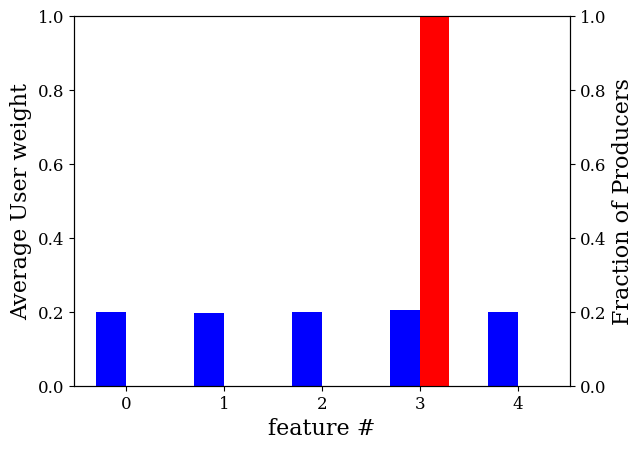

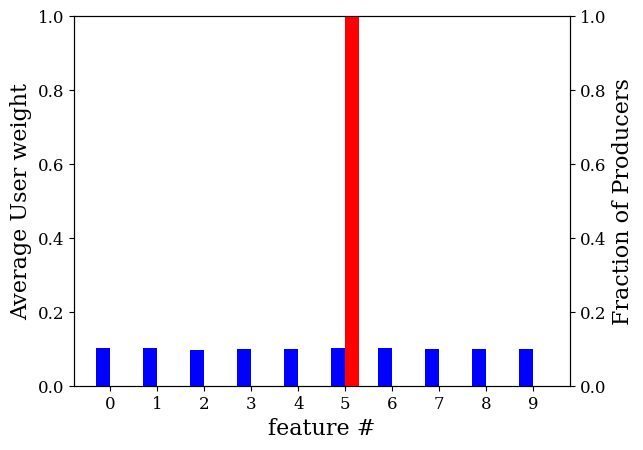

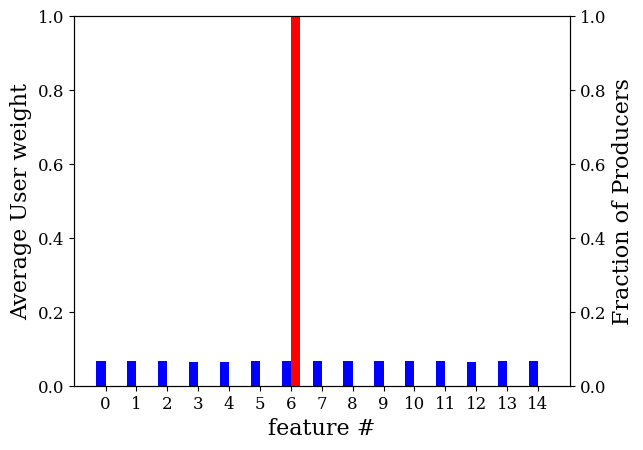

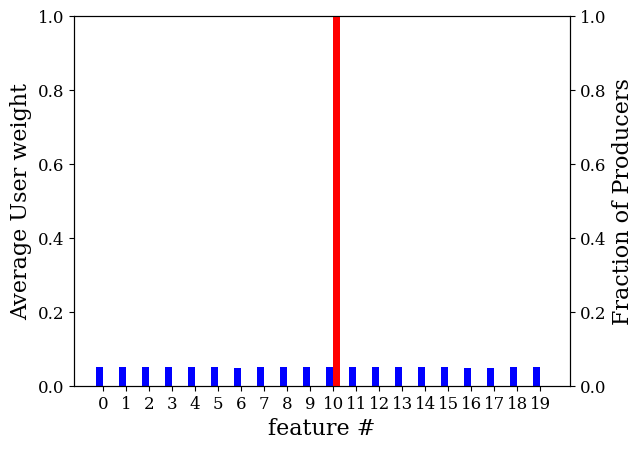

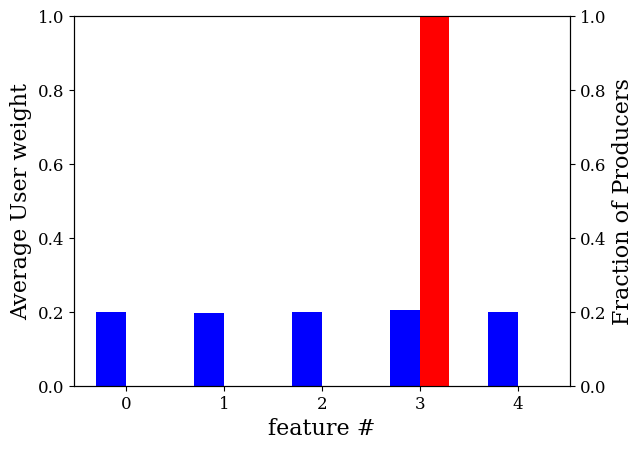

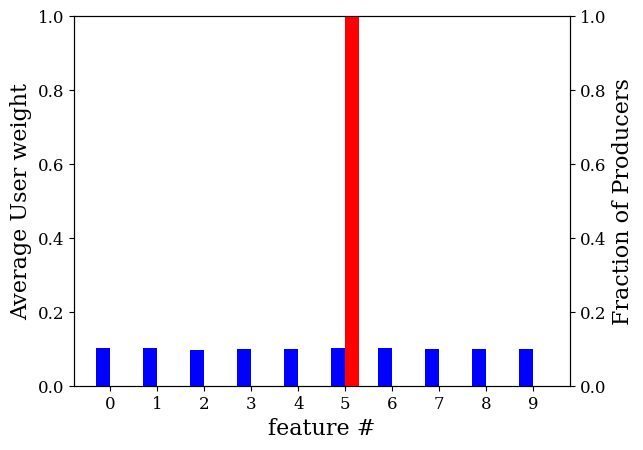

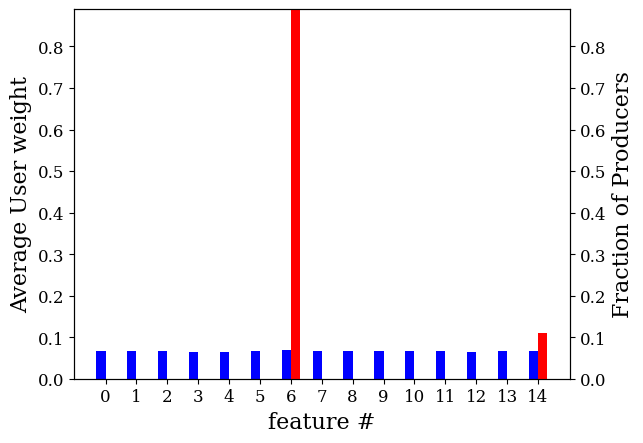

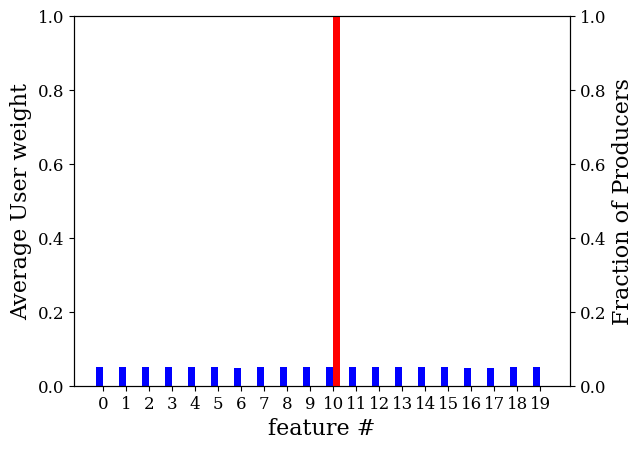

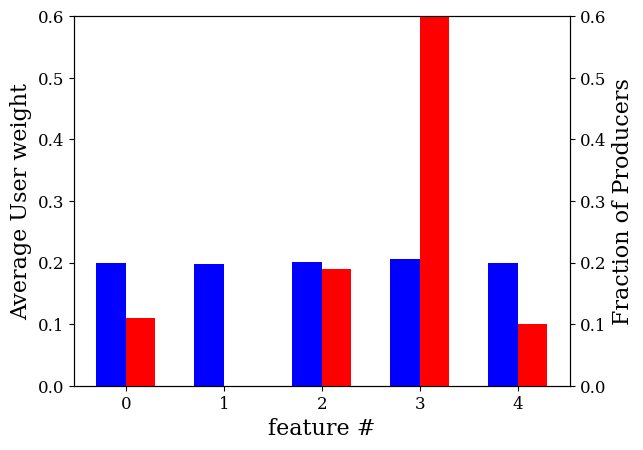

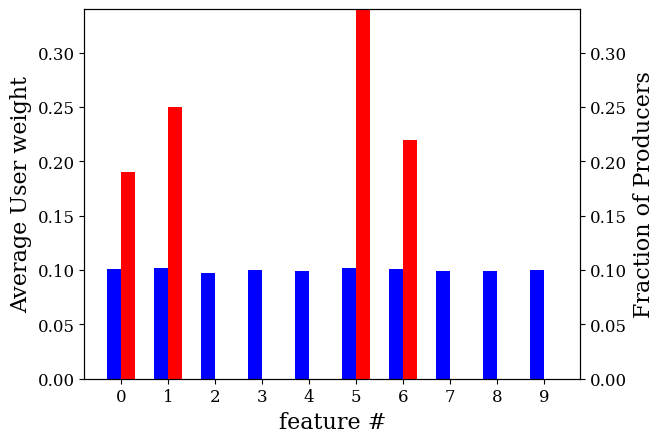

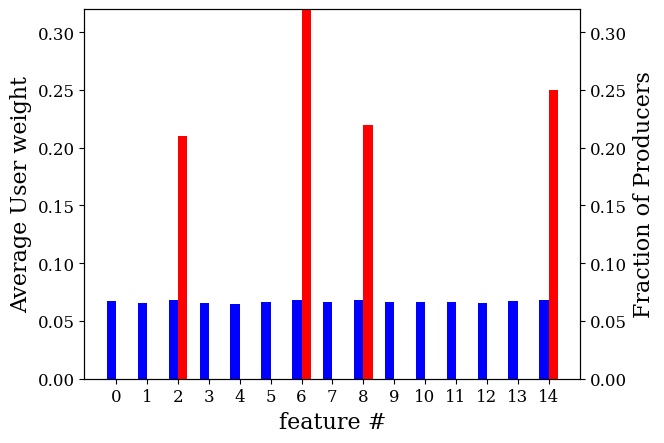

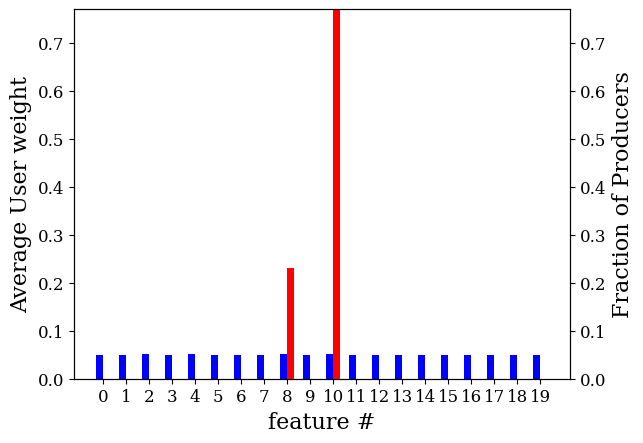

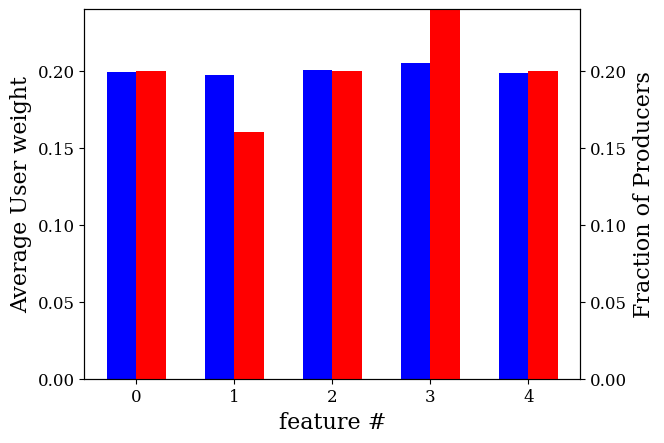

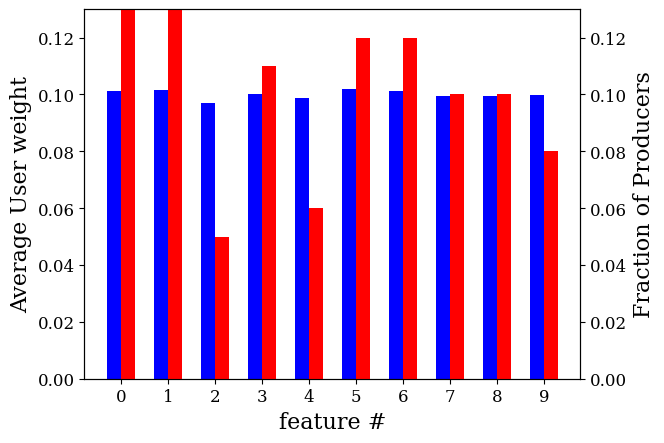

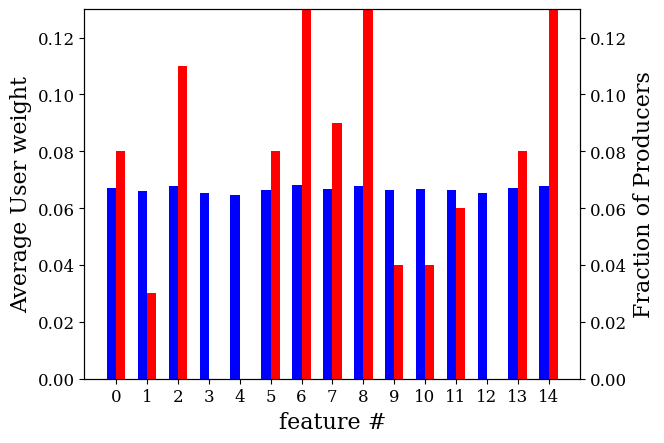

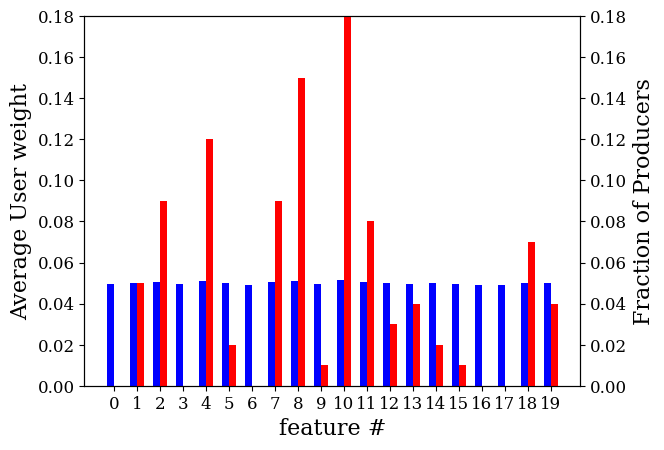

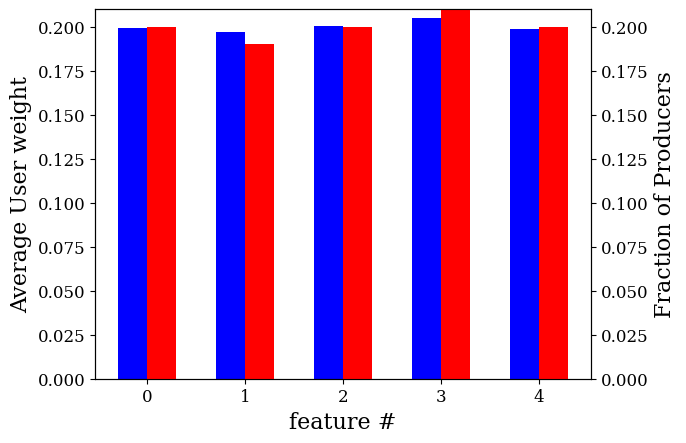

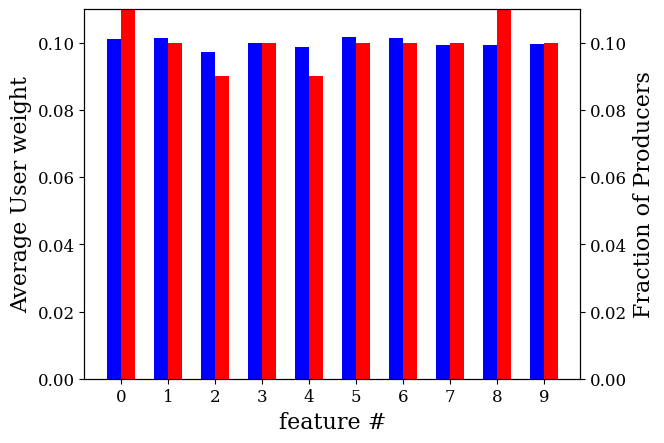

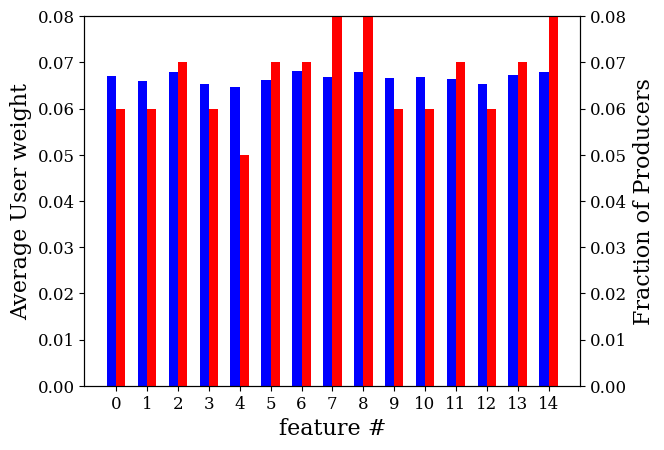

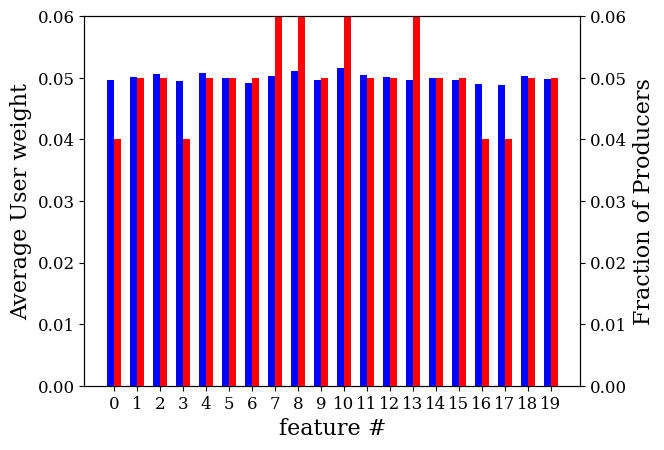

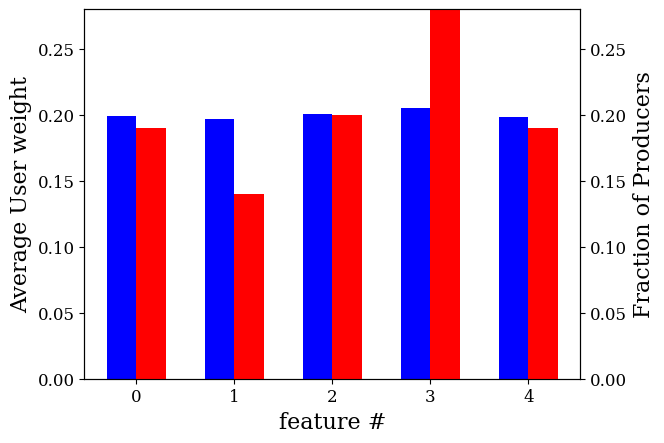

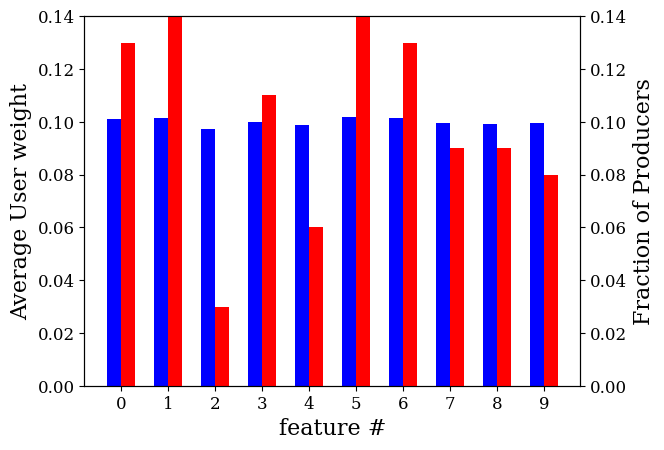

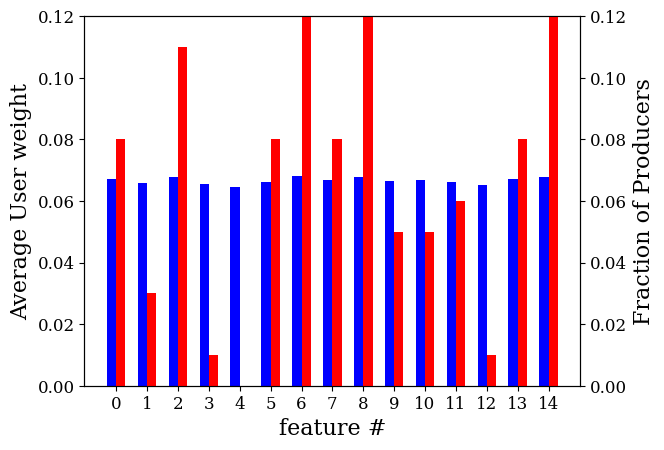

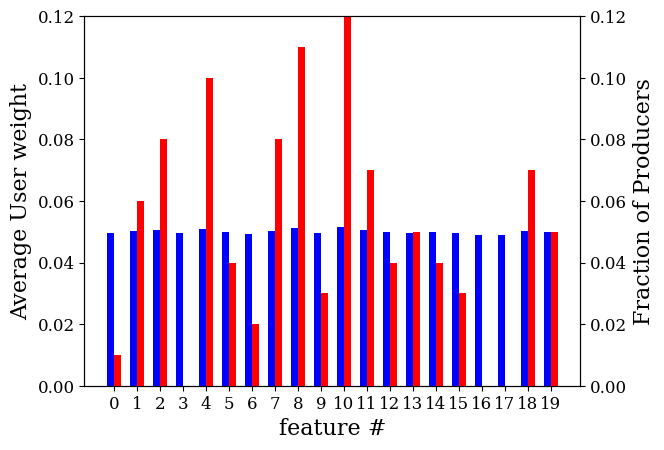

In [14]:
# temp = 100 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_100, name = 'rentrunway/rentrunway_temp100')

# temp = 10 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_10, name = 'rentrunway/rentrunway_temp10')

# temperature = 1, old exps
plot_and_save_singledf(dims = dims, df = df_1, name = 'rentrunway/rentrunway_temp1')

# temp 0.1
plot_and_save_singledf(dims = dims, df = df_01, name = 'rentrunway/rentrunway_temp01')

# temp 0.01
plot_and_save_singledf(dims = dims, df = df_001, name = 'rentrunway/rentrunway_temp001')

# linear
plot_and_save_singledf(dims = dims, df = df_linear, name = 'rentrunway/rentrunway_linear')

## Movielens dataset
Across different temeperatures

t = 100, 10, 1, 0.1, 0.01

In [15]:
df_100 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/movielens-100k_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/movielens-100k_linear_temp_1.0/concseeds5.pkl")

In [16]:
(df_001['NE_exists'] == False).sum(), (df_01['NE_exists'] == False).sum(), \
(df_1['NE_exists']==False).sum(), (df_10['NE_exists']==False).sum(), \
(df_100['NE_exists']==False).sum(), (df_linear['NE_exists']==False).sum()

(7, 0, 0, 0, 0, 0)

In [17]:
df_001[df_001['NE_exists'] == False]

,dimension,emb_seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
24,15,13,2,False,499,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, ...","[0.06883625645399127, 0.0648861598966524, 0.06...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,10,17,2,False,499,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, ...","[0.09743714394223246, 0.09873632701790554, 0.1...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
36,20,17,2,False,499,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, ...","[0.050741754962531076, 0.05154969872898003, 0....",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
12,10,23,2,False,499,"[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.10071139067232268, 0.10326636883171202, 0.0...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
26,15,23,10,False,499,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.1, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, ...","[0.06601912110442619, 0.067822278938963, 0.065...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25,15,29,5,False,499,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, ...","[0.06766925960318655, 0.06847490301121467, 0.0...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
13,10,19,5,False,499,"[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0.0, 0.2, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, ...","[0.10120745614116394, 0.09955993688945104, 0.1...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


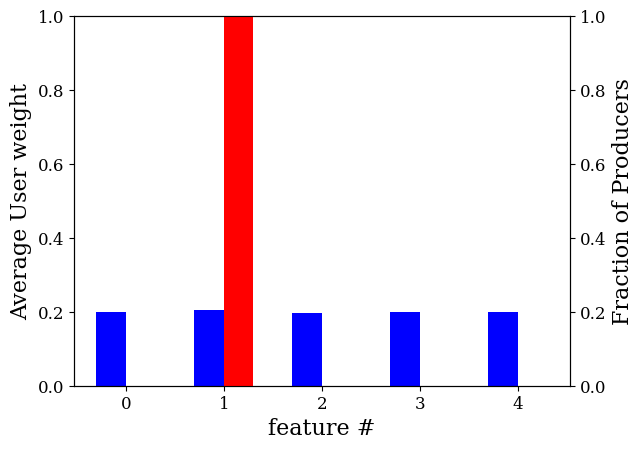

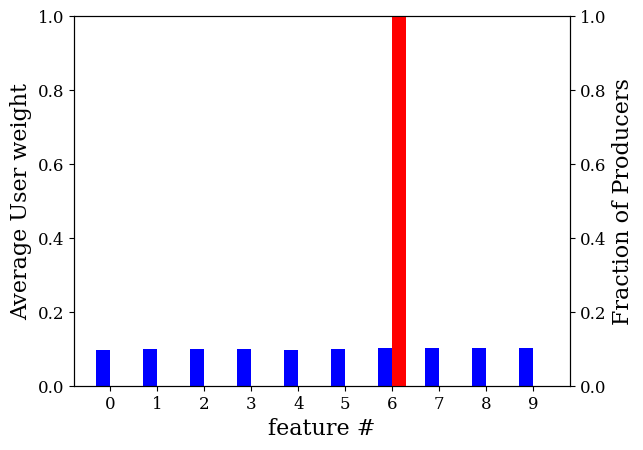

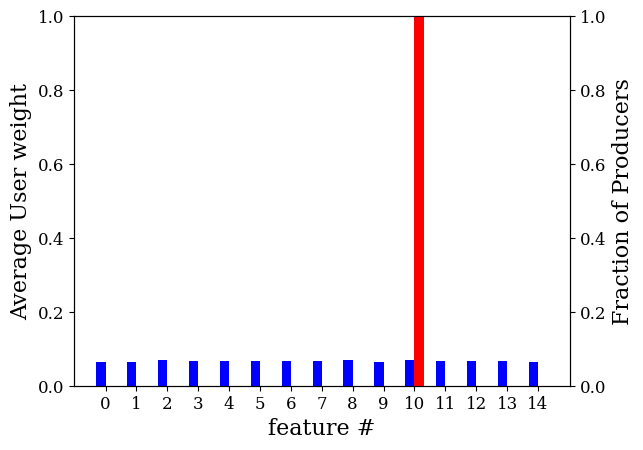

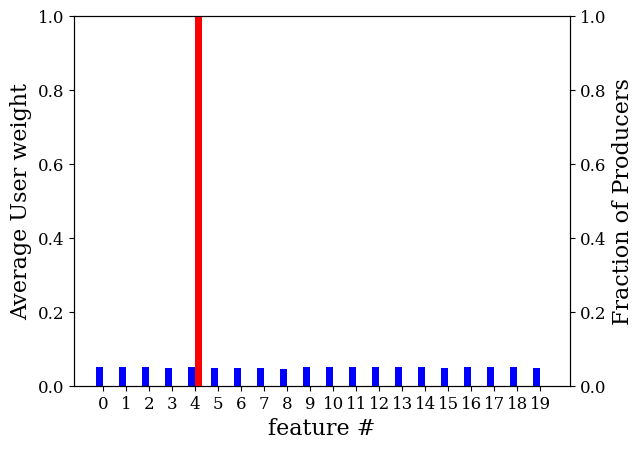

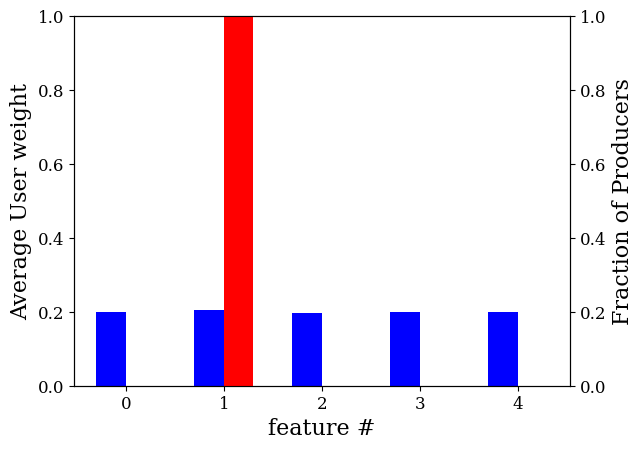

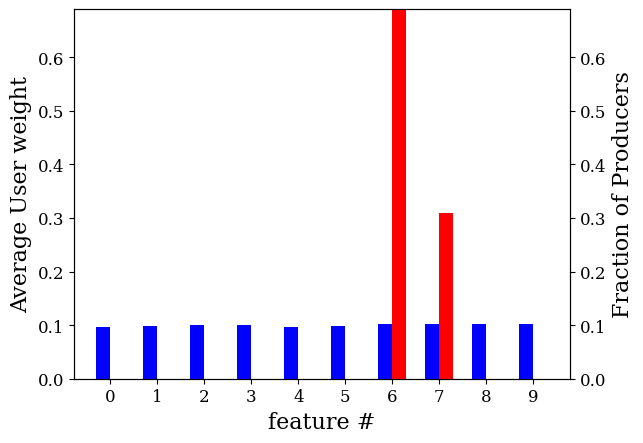

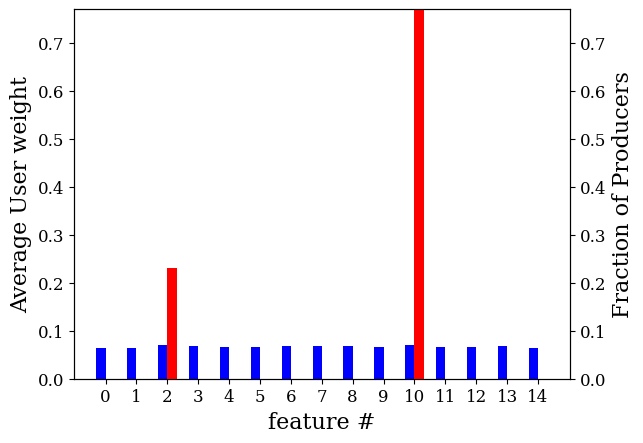

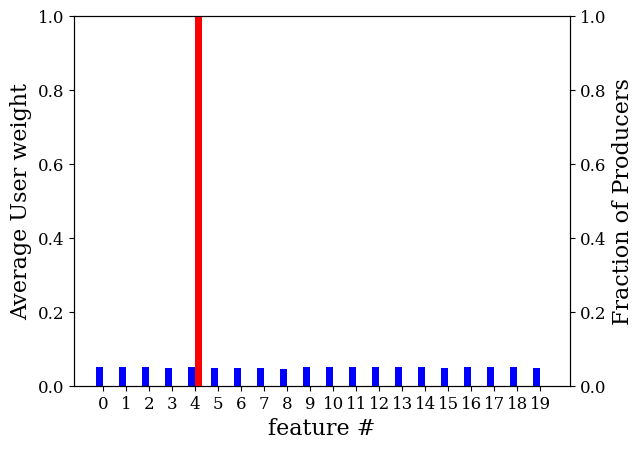

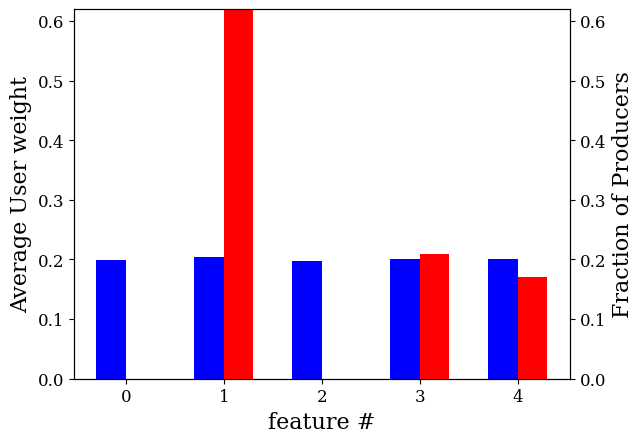

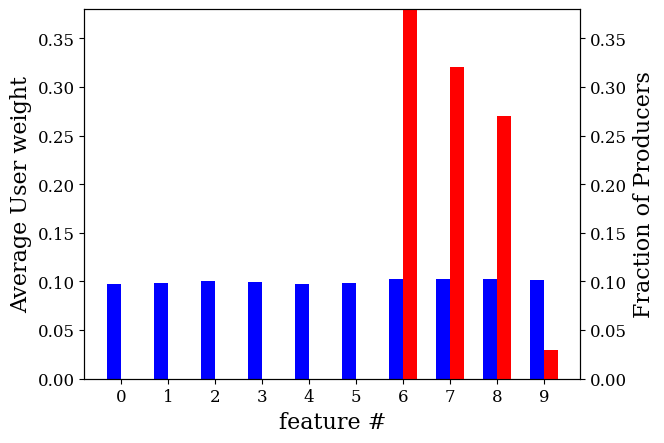

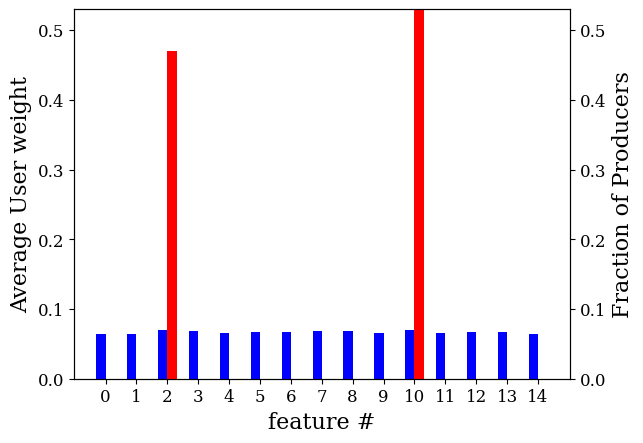

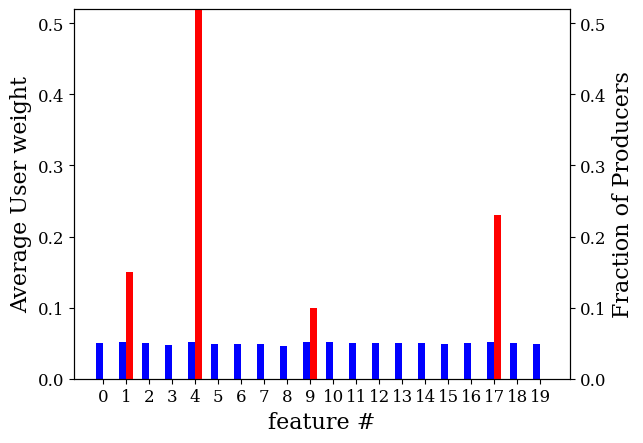

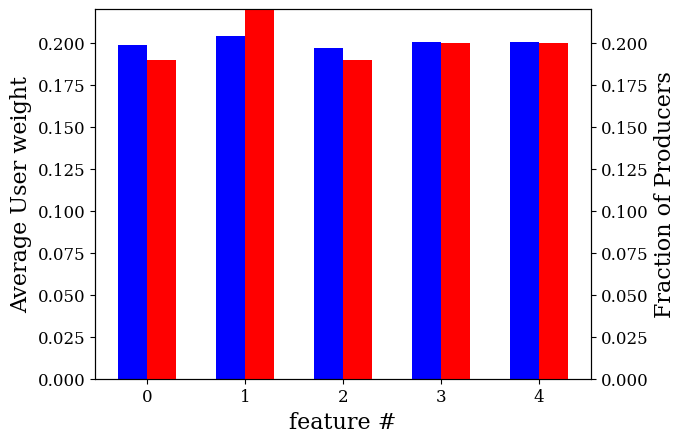

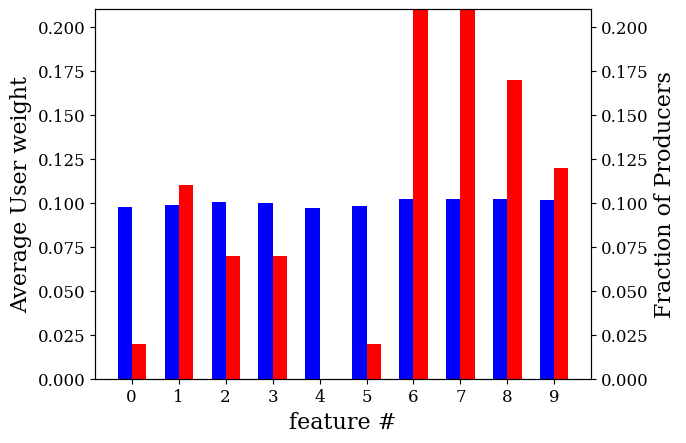

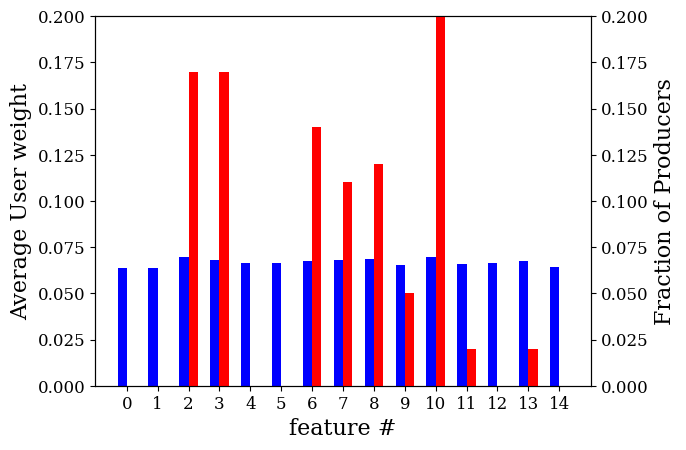

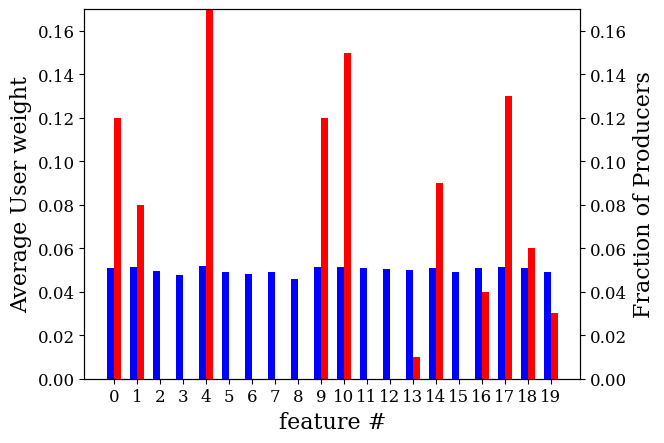

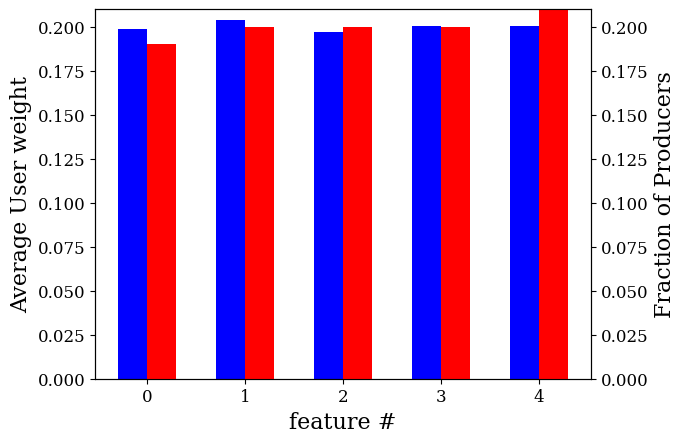

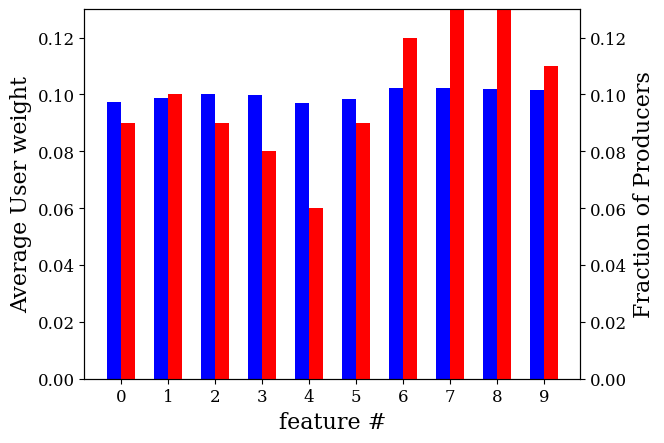

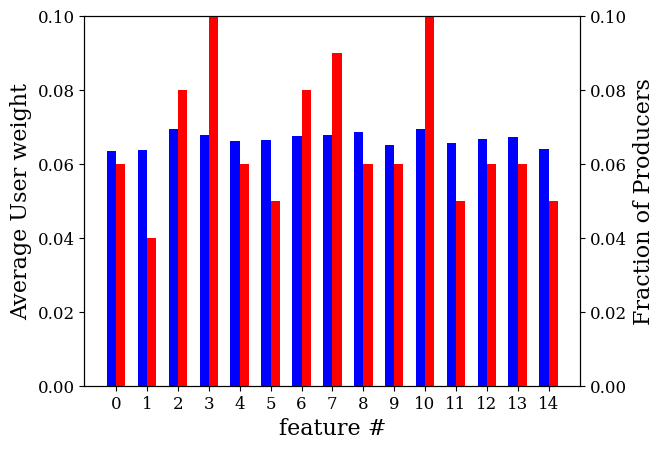

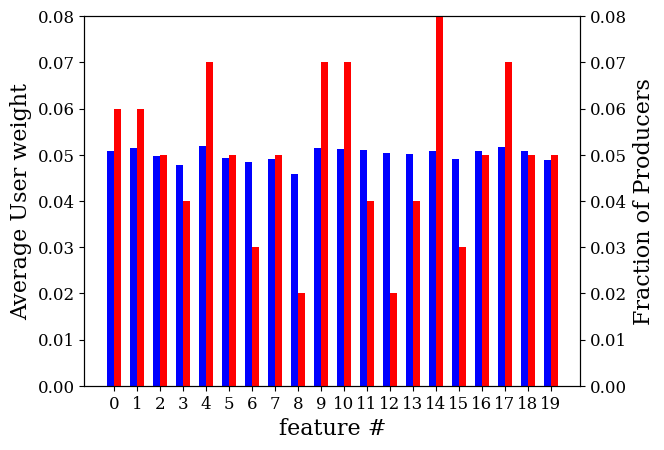

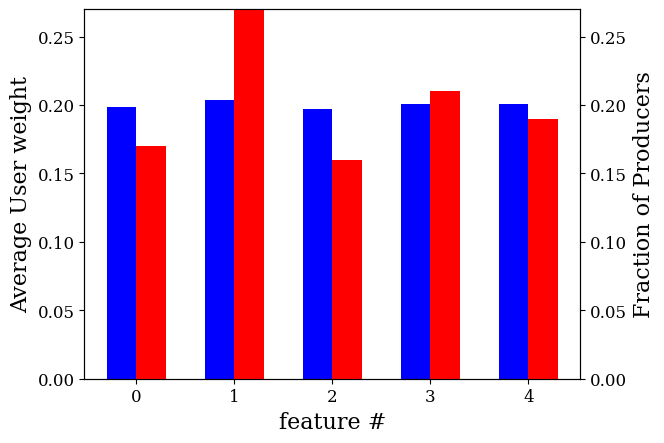

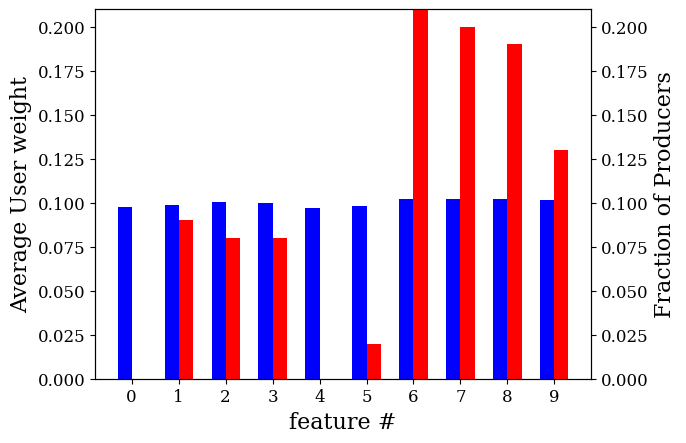

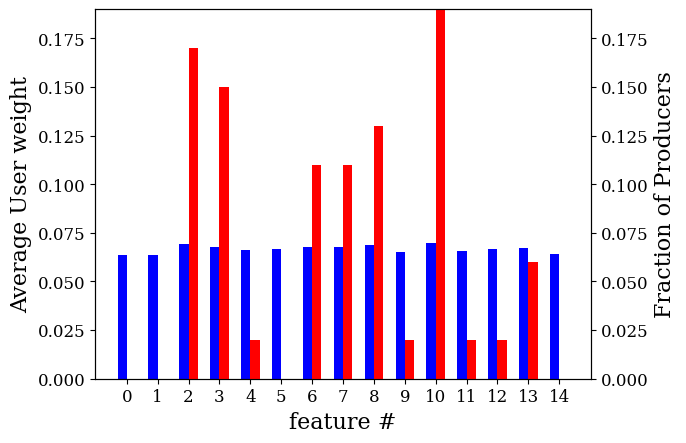

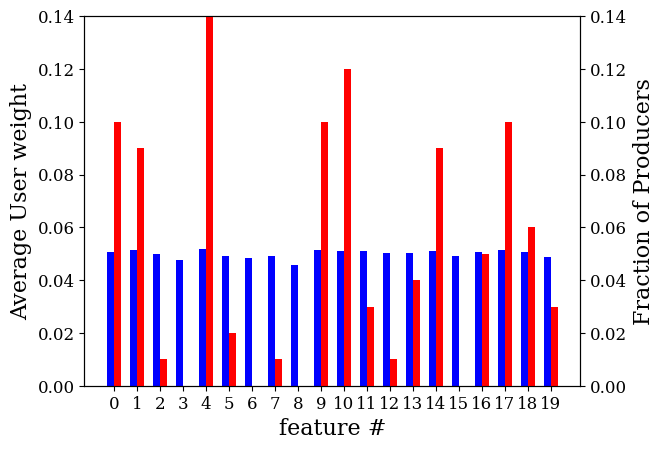

In [18]:
# temp = 100 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_100, name = 'movielens/movielens100k_temp100')

# temp = 10 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_10, name = 'movielens/movielens100k_temp10')

# temperature = 1, old exps
plot_and_save_singledf(dims = dims, df = df_1, name = 'movielens/movielens100k_temp1')

# temp 0.1
plot_and_save_singledf(dims = dims, df = df_01, name = 'movielens/movielens100k_temp01')

# temp 0.01
plot_and_save_singledf(dims = dims, df = df_001, name = 'movielens/movielens100k_temp001')

# linear
plot_and_save_singledf(dims = dims, df = df_linear, name = 'movielens/movielens100k_linear')


## Skewed dataset
Across different temeperatures

t = 100, 10, 1, 0.1, 0.01

In [19]:
df_100 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_100.0/concseeds5.pkl")
df_10 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_10.0/concseeds5.pkl")
df_1 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_1.0/concseeds5.pkl")
df_01 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.1/concseeds5.pkl")
df_001 = pd.read_pickle("../saved_frames/synth-skewed_softmax_temp_0.01/concseeds5.pkl")
df_linear = pd.read_pickle("../saved_frames/synth-skewed_linear_temp_1.0/concseeds5.pkl")

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/notebooks/../source/plotting.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


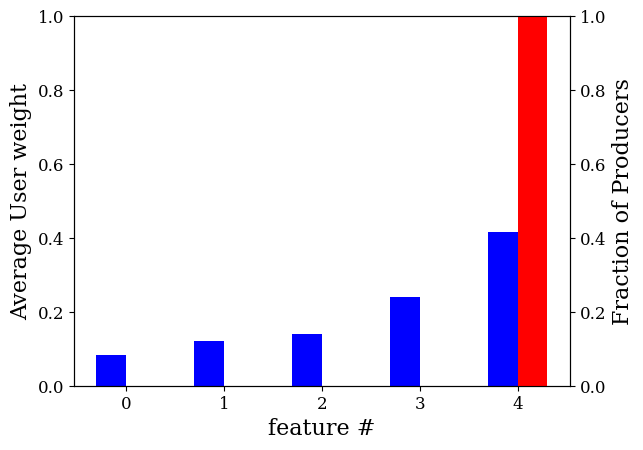

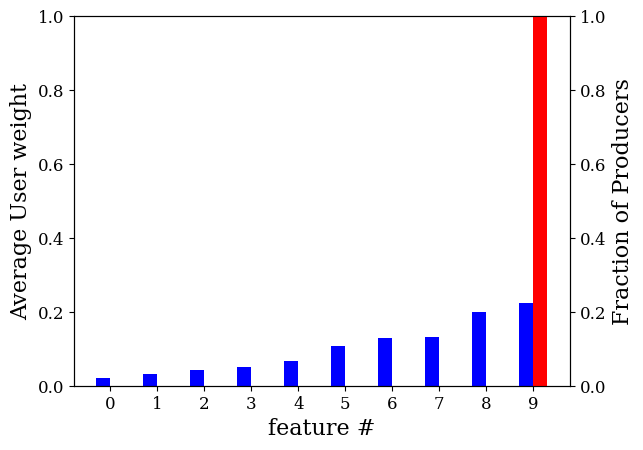

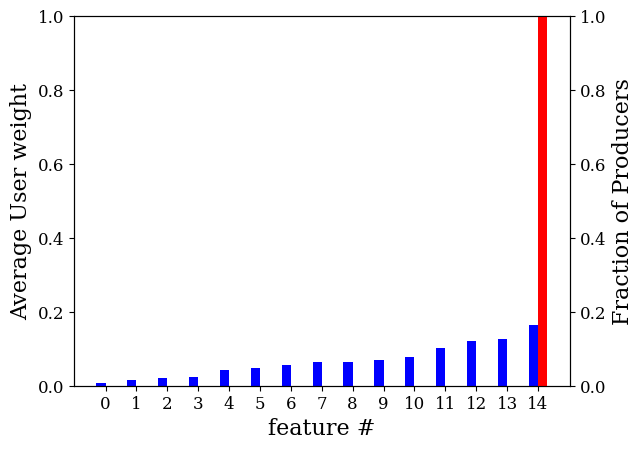

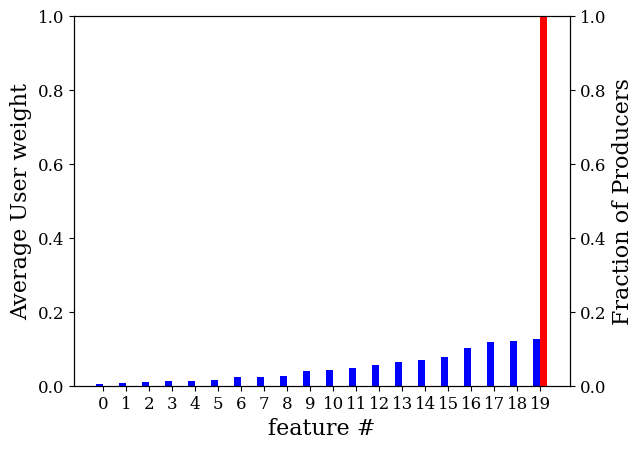

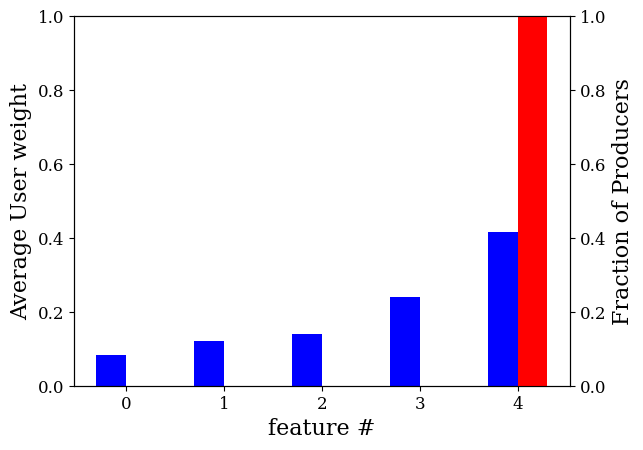

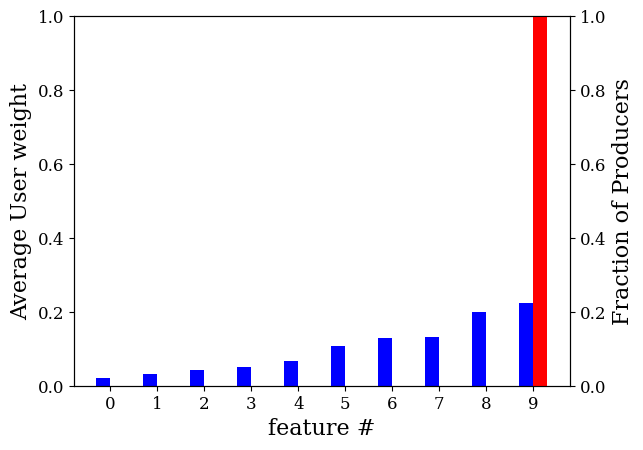

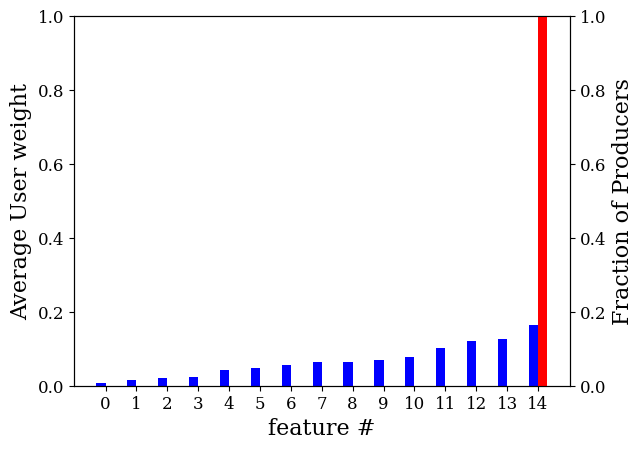

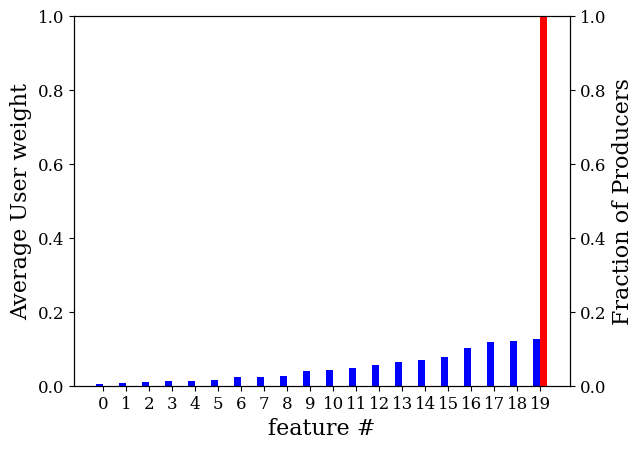

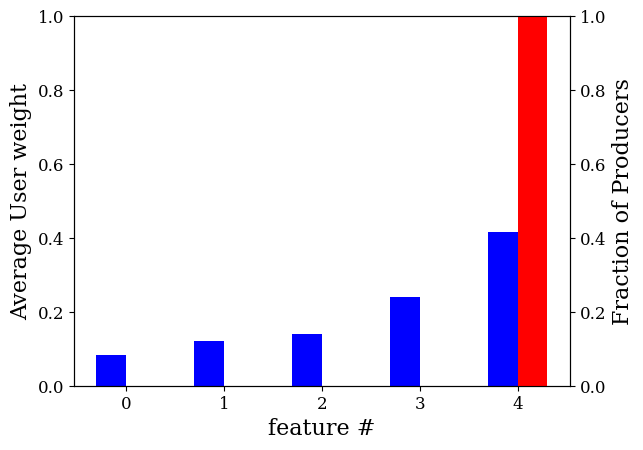

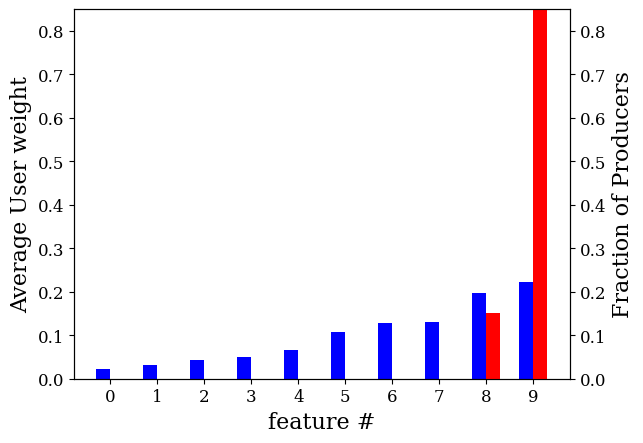

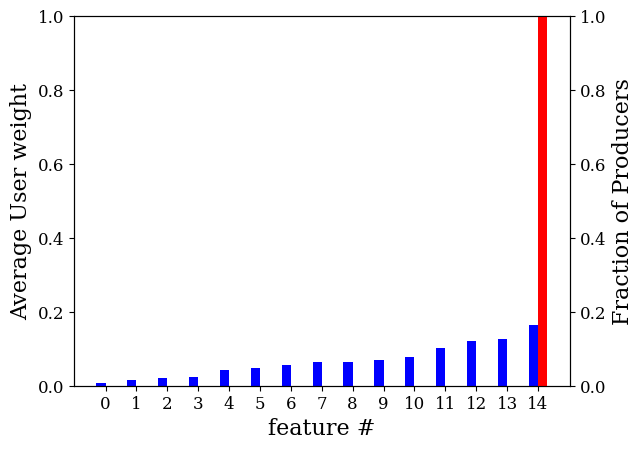

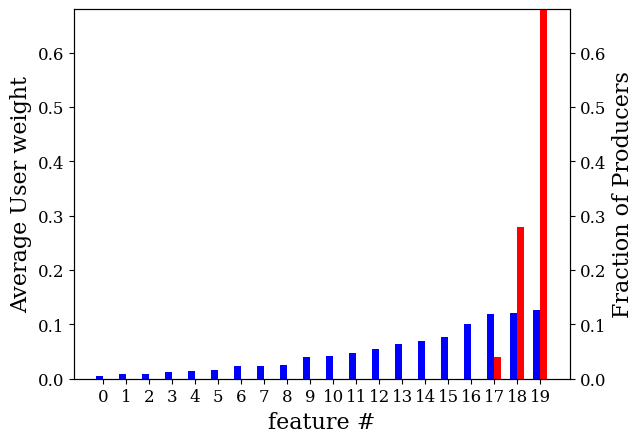

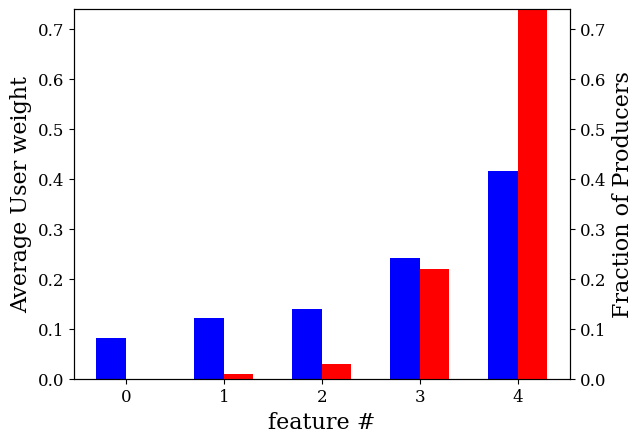

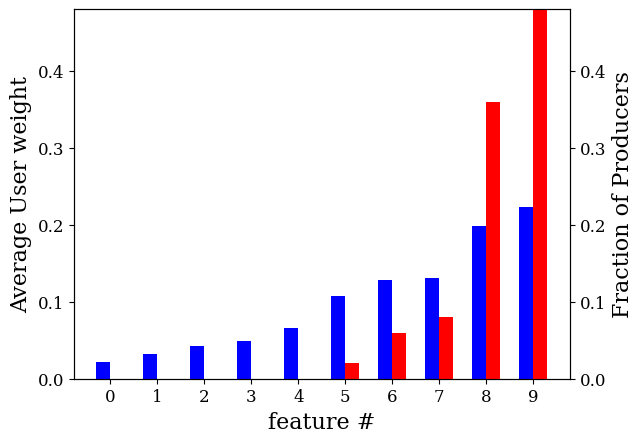

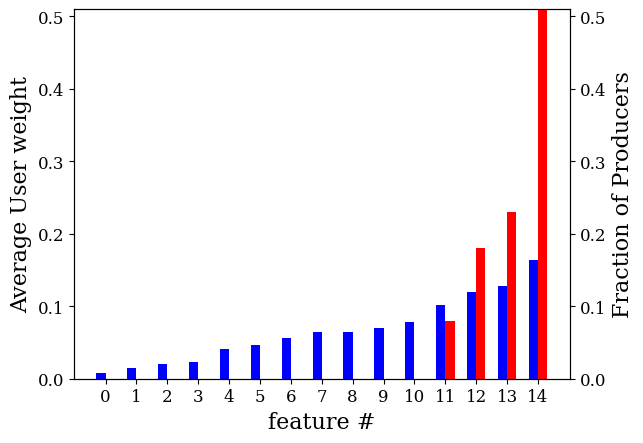

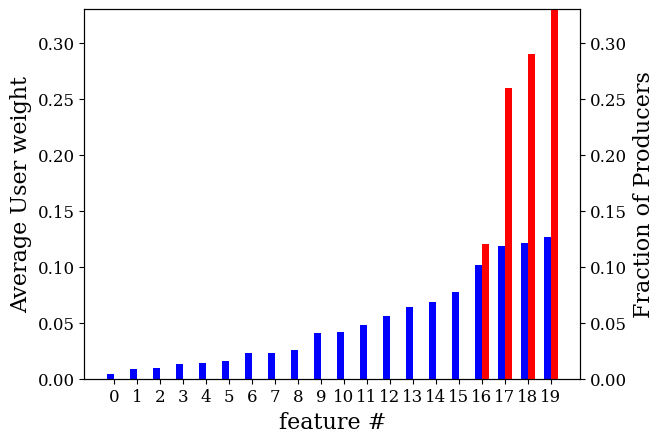

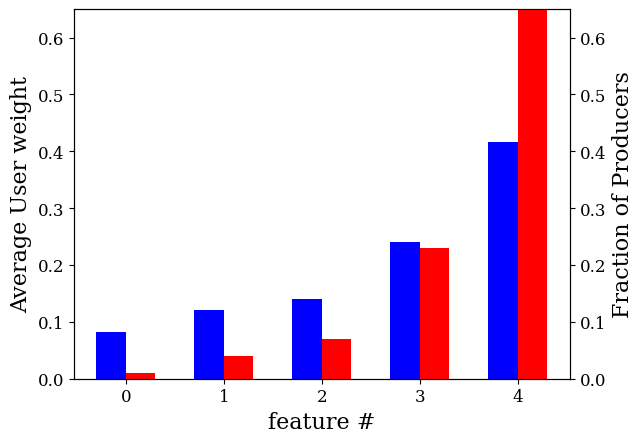

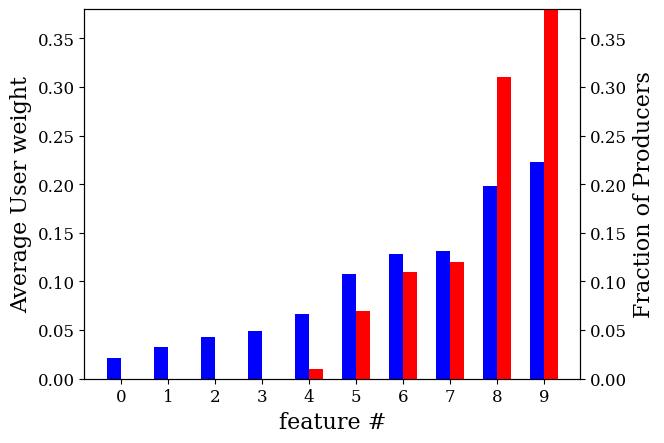

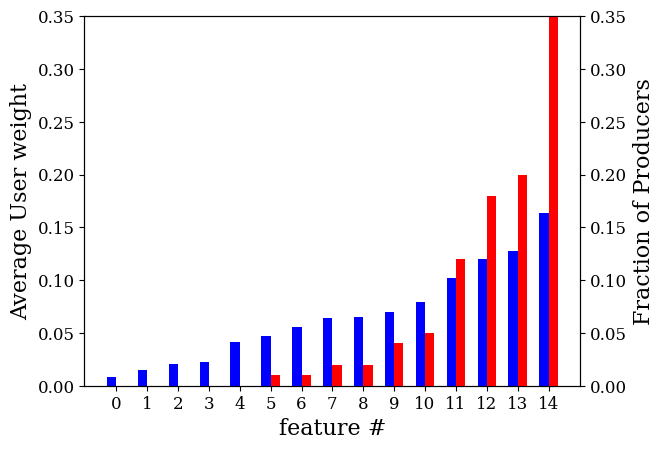

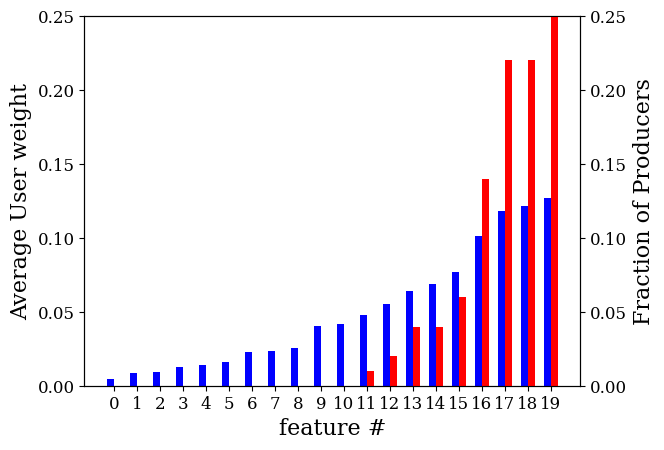

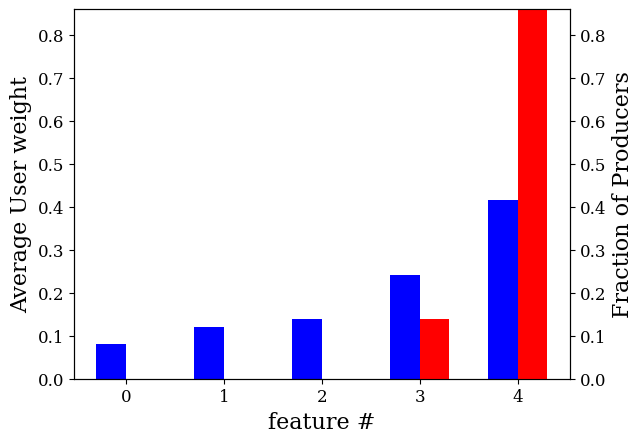

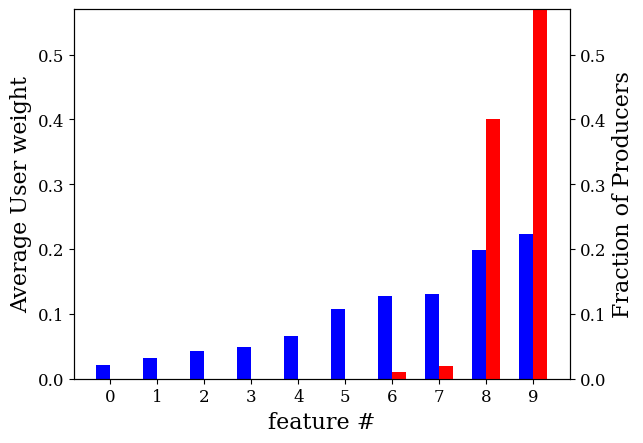

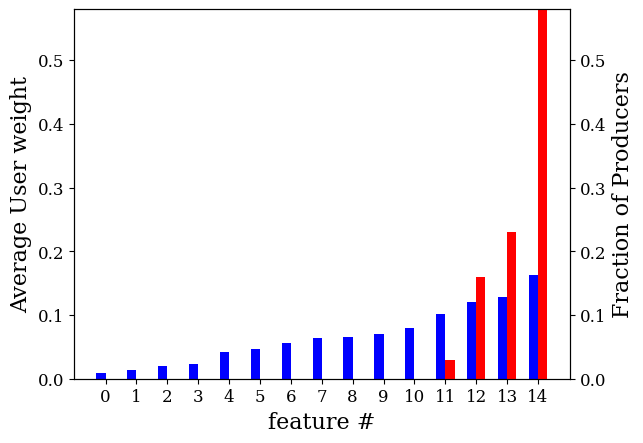

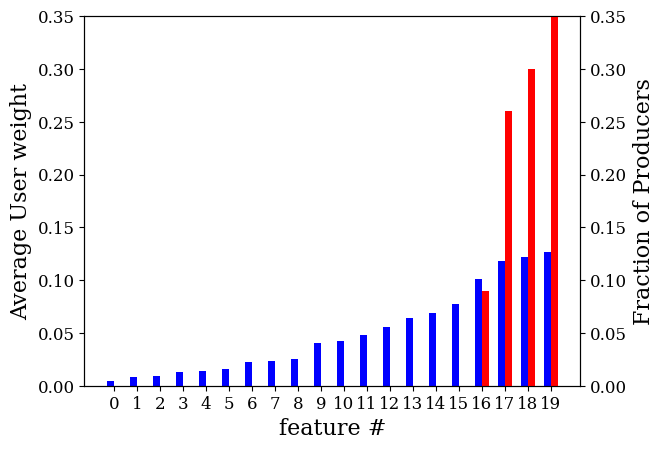

In [20]:
# temp = 100 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_100, name = 'synth-skewed/synth-skewed_temp100')

# temperature = 10
plot_and_save_singledf(dims = dims, df = df_10, name = 'synth-skewed/synth-skewed_temp10')

# temp 1
plot_and_save_singledf(dims = dims, df = df_1, name = 'synth-skewed/synth-skewed_temp1')

# temp 0.1
plot_and_save_singledf(dims = dims, df = df_01, name = 'synth-skewed/synth-skewed_temp01')

# temp 0.01
plot_and_save_singledf(dims = dims, df = df_001, name = 'synth-skewed/synth-skewed_temp001')

#linear
plot_and_save_singledf(dims = dims, df = df_linear, name = 'synth-skewed/synth-skewed_linear')


In [21]:
df_uf_1[common_param].equals(df_uf_01[common_param])

NameError: name 'df_uf_1' is not defined

In [ ]:
df_uf_100.shape, df_uf_1.shape, df_uf_01.shape,df_uf_001.shape

In [ ]:
# temp = 100 nearly iid random rec
plot_and_save_singledf(dims = dims, df = df_uf_100, name = 'synth-skewed/synth-skewed_temp100')

# temperature = 1, old exps
plot_and_save_singledf(dims = dims, df = df_uf_1, name = 'synth-skewed/synth-skewed_temp1')

# temp 0.1
plot_and_save_singledf(dims = dims, df = df_uf_01, name = 'synth-skewed/synth-skewed_temp01')

# temp 0.01
plot_and_save_singledf(dims = dims, df = df_uf_001, name = 'synth-skewed/synth-skewed_temp001')